In [10]:
#Transform given input series into stationary data with following methods: A=[10,15,2,8,1,30,45,65,32,23,70]
#    Differencing
#    Transforming
#    Detrending
#    Seasonal differencing

import numpy as np
import pandas as pd

# Sample non-stationary data
data = np.array([10,15,2,8,1,30,45,65,32,23,70])

# Step 1: Check if data is stationary
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: 4.207097481269881
p-value: 1.0
Critical Values: {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
The series is not stationary.


In [2]:
# Differencing

dif_data=np.diff(data)

print(dif_data)

# Perform ADF test (differencing)
result = adfuller(dif_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

[  5 -13   6  -7  29  15  20 -33  -9  47]
ADF Statistic: -0.372043491061525
p-value: 0.9146629139913824
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
The series is not stationary.


In [3]:
# Log tranformacion

log_data = np.log(data)

print("Log transformed data:", log_data)

# Perform ADF test 

result = adfuller(log_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

Log transformed data: [2.30258509 2.7080502  0.69314718 2.07944154 0.         3.40119738
 3.80666249 4.17438727 3.4657359  3.13549422 4.24849524]
ADF Statistic: -1.8319688119064859
p-value: 0.36470950229143895
Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
The series is not stationary.


In [4]:
# Root square transformation 

import math


def sqrt_transformation(data):
    return [math.sqrt(value) for value in data]

# Apply square root transformation
sqrt_data = sqrt_transformation(data)
print(sqrt_data) 

# Perform ADF test 

result = adfuller(sqrt_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

[3.1622776601683795, 3.872983346207417, 1.4142135623730951, 2.8284271247461903, 1.0, 5.477225575051661, 6.708203932499369, 8.06225774829855, 5.656854249492381, 4.795831523312719, 8.366600265340756]
ADF Statistic: -1.2384053468094374
p-value: 0.6568604556287047
Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
The series is not stationary.


In [5]:
#Detendring
from sklearn import linear_model

time = np.arange(len(data)).reshape(-1, 1)

# Fit linear regression
model = linear_model.LinearRegression().fit(time, data)
trend = model.predict(time)

# Detrended data
detrended_data = data - trend

print("actual data",data)
print("Detrended data:", detrended_data)

actual data [10 15  2  8  1 30 45 65 32 23 70]
Detrended data: [  9.           8.72727273  -9.54545455  -8.81818182 -21.09090909
   2.63636364  12.36363636  27.09090909 -11.18181818 -25.45454545
  16.27272727]


In [6]:
# Perform ADF test for detrended data

result = adfuller(detrended_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -3.2822115397800258
p-value: 0.015692586890187654
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
The series is stationary.


In [7]:
# Seasonal differencing (seasonal period = 3)
seasonal_diff_data = data[3:] - data[:-3]

print("Seasonally differenced data:", seasonal_diff_data)

# Perform ADF test

result = adfuller(detrended_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

Seasonally differenced data: [ -2 -14  28  37  64   2 -22   5]
ADF Statistic: -3.2822115397800258
p-value: 0.015692586890187654
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
The series is stationary.


In [ ]:
#Detrending and seasonal difference helps to transform data into stationary

In [ ]:
#LAB 2: implement an Autoregressive (AR) model of order 1 (AR(1)) using Python and analyze its performance.

In [3]:
#Generate synthetic data for an AR(1) process with known parameters.

import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
c = 3
phi1 = 0.9
num_steps = 140

# Generate AR(1) series
epsilon = np.random.normal(0, 1, num_steps)
X = np.zeros(num_steps)
X[0] = c / (1 - phi1)  # Set initial value using steady state value
for t in range(1, num_steps):
    X[t] = c + phi1 * X[t-1] + epsilon[t]

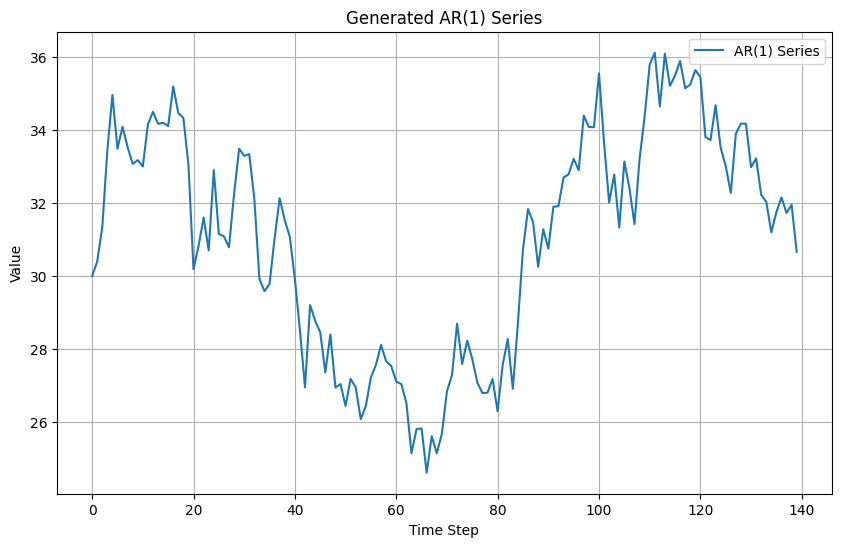

In [4]:
# Plot the generated series
plt.figure(figsize=(10, 6))
plt.plot(X, label='AR(1) Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Generated AR(1) Series')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Fit AR(1) model using statsmodels AutoReg
ar_model = AutoReg(X, lags=1)  # Fit AR(1) model
ar_results = ar_model.fit()

# Print model summary
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  140
Model:                     AutoReg(1)   Log Likelihood                -196.457
Method:               Conditional MLE   S.D. of innovations              0.994
Date:                Fri, 31 May 2024   AIC                            398.914
Time:                        12:17:18   BIC                            407.717
Sample:                             1   HQIC                           402.491
                                  140                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6901      0.857      1.972      0.049       0.010       3.370
y.L1           0.9458      0.027     34.445      0.000       0.892       1.000
                                    Roots           

In [ ]:
#Log likelihood is low, not good fit

In [76]:
#Determining the Best Lag using AIC and BIC
aic_values = []
bic_values = []
lag_range = range(1, 5)  

for lag in lag_range:
    model = AutoReg(X, lags=lag)
    model_fit = model.fit()
    aic_values.append(model_fit.aic)
    bic_values.append(model_fit.bic)

best_aic_lag = lag_range[np.argmin(aic_values)]
best_bic_lag = lag_range[np.argmin(bic_values)]

print(f"Best lag according to AIC: {best_aic_lag}")
print(f"Best lag according to BIC: {best_bic_lag}")

Best lag according to AIC: 4
Best lag according to BIC: 1


In [79]:
# Fit AR(4) model using statsmodels AutoReg
ar_model = AutoReg(X, lags=4)  # Fit AR(1) model
ar_results = ar_model.fit()

# Print model summary
print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  140
Model:                     AutoReg(4)   Log Likelihood                -190.486
Method:               Conditional MLE   S.D. of innovations              0.982
Date:                Fri, 31 May 2024   AIC                            392.972
Time:                        17:13:25   BIC                            410.448
Sample:                             4   HQIC                           400.074
                                  140                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5264      0.879      1.737      0.082      -0.196       3.249
y.L1           0.8746      0.085     10.329      0.000       0.709       1.041
y.L2           0.0892      0.113      0.787      0.4

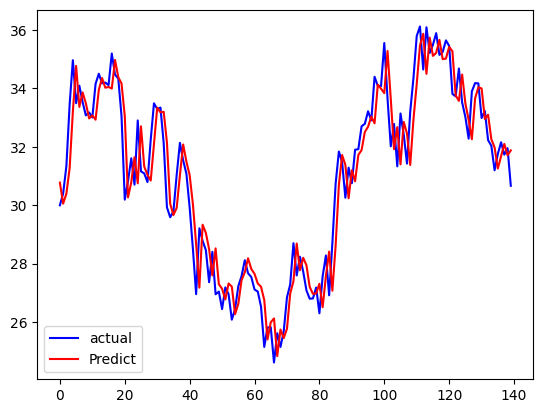

In [75]:
# Walk-forward validation
history = [i for i in X]
predictions = []

for i in range(len(X)):
    # Fit AR(4) model
    model = AutoReg(history, lags=4) # AR(49) model
    model_fit = model.fit()
    
    # Forecast next value
    y_pred = model_fit.forecast()[0]
    predictions.append(y_pred)
    
    # Update history
    obs = X[i]
    history.append(obs)

# Plot actual vs. predicted
plt.plot(X, label="actual", color='blue')
plt.plot(predictions, color='red', label="Predict")
plt.legend(loc='best')
plt.show()


In [65]:
#LAB 3:

#Import profit dataset

profit_data= pd.read_csv('C:/Users/jesus/downloads/profit_data.csv')  
# Drop rows with missing or NaN value if any
profit_data = profit_data.dropna(subset=['Profit'])
profit_data.describe()

,Profit
count,60.000000
mean,10153.334591
std,2137.569589
min,4894.020368
25%,8916.631247
50%,10188.192239
75%,11530.301766
max,14539.509248


In [66]:
profit_data.head(5)

,Date,Profit
0,2015-01-31,13528.104692
1,2015-02-28,10800.314417
2,2015-03-31,11957.475968
3,2015-04-30,14481.786398
4,2015-05-31,13735.115980


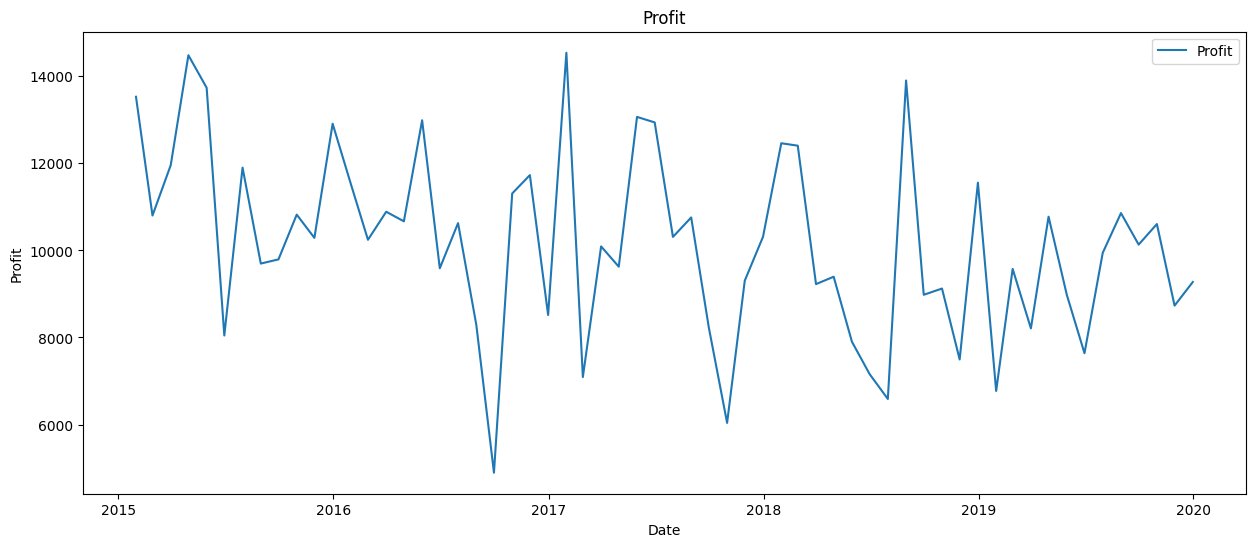

In [45]:
profit_data['Date'] = pd.to_datetime(profit_data['Date'], format='mixed')
profit_data.set_index('Date', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(profit_data.index, profit_data['Profit'], label='Profit')
plt.title('Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [46]:
# Perform ADF test
result = adfuller(profit_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -7.047406866009781
p-value: 5.640008260069544e-10
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
The series is stationary.


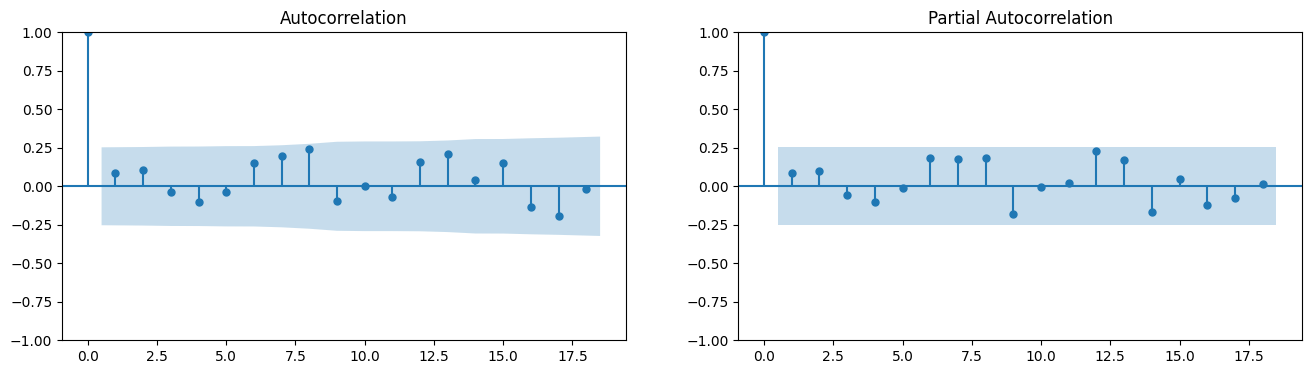

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(profit_data, ax=axes[0])
plot_pacf(profit_data, ax=axes[1])
plt.show()

C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   60
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -543.084
Date:                Fri, 31 May 2024   AIC                           1092.169
Time:                        17:00:46   BIC                           1098.350
Sample:                    01-31-2015   HQIC                          1094.577
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3345      0.098     -3.407      0.001      -0.527      -0.142
ma.L1         -0.9998      0.165     -6.043      0.000      -1.324      -0.676
sigma2      7.235e+06   2.28e-08   3.17e+14      0.0

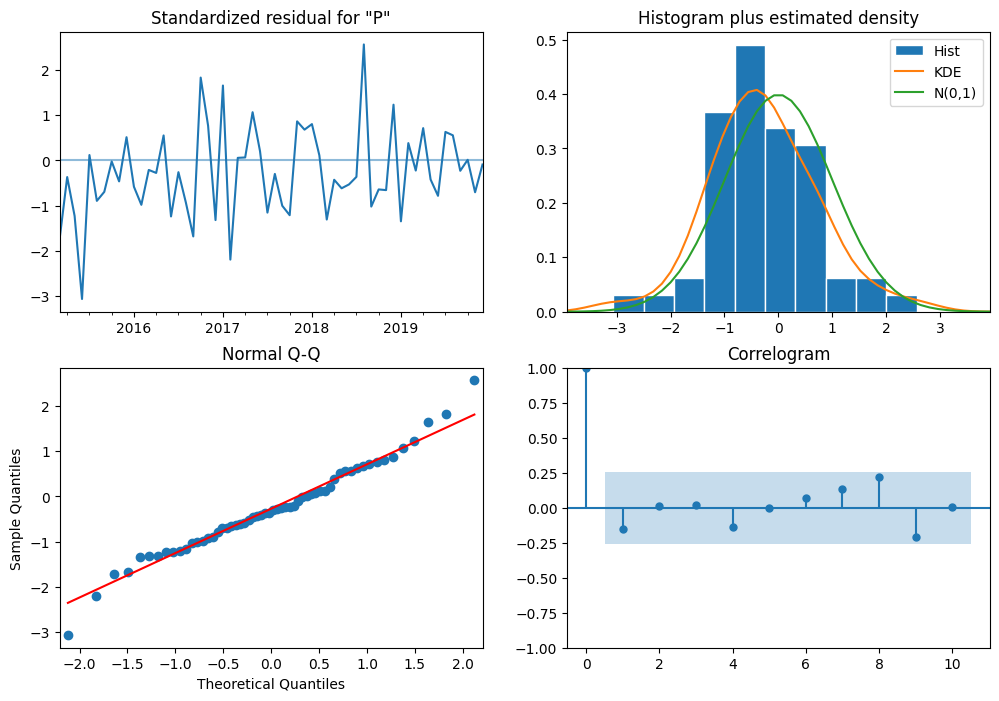

In [57]:
#Using the preprocessed data, fit an ARIMA(1,2,1) model. Explain the process of choosing the parameters (p=1, d=2, q=1). Include the code and output for fitting the model. What are the AIC and BIC values of this model, and how do they help in model evaluation?
#ACF & PACF helps to select the parameters, none of the value are above the 95% confidence value, we can took 1 and 1.
#Since the data is already stationary there not neccesity to make any differencing. the d parameter could be 0

# Fit the ARIMA model with different order (1, 2, 1)
model = ARIMA(profit_data, order=(1, 2, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Model diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   60
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -544.370
Date:                Fri, 31 May 2024   AIC                           1096.741
Time:                        16:56:22   BIC                           1105.118
Sample:                    01-31-2015   HQIC                          1100.017
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.015e+04    302.728     33.540      0.000    9560.000    1.07e+04
ar.L1          0.4446      1.024      0.434      0.664      -1.563       2.452
ma.L1         -0.3449      1.079     -0.320      0.7

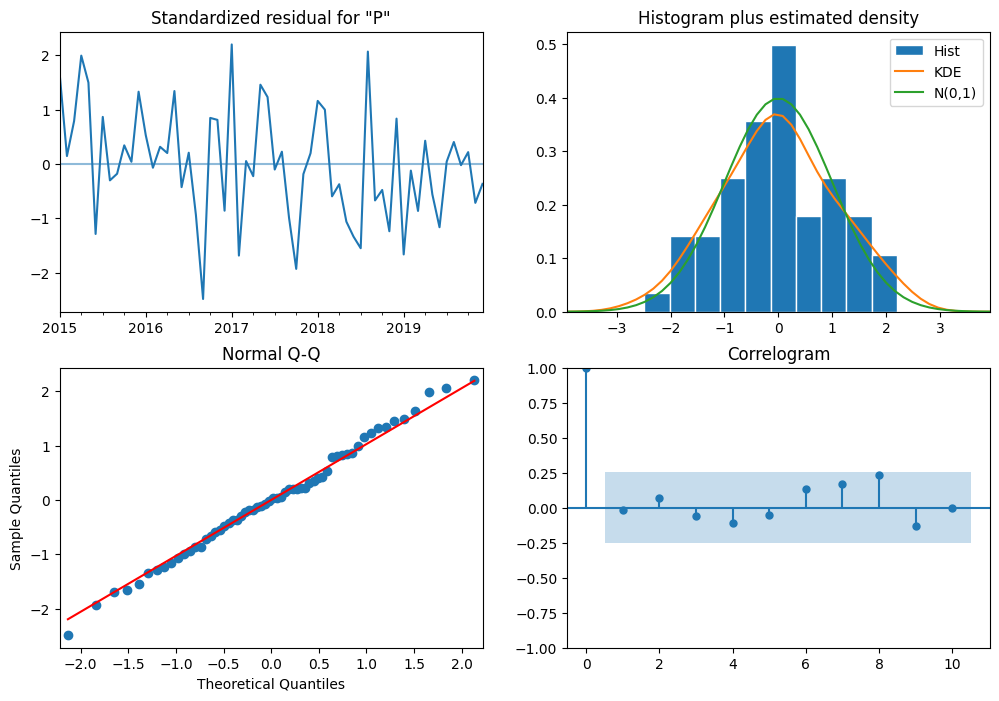

In [55]:
#Using the preprocessed data, fit an ARIMA(1,0,1) model. Explain the process of choosing the parameters (p=1, d=0, q=1). Include the code and output for fitting the model. What are the AIC and BIC values of this model, and how do they help in model evaluation?
#ACF & PACF helps to select the parameters, none of the value are above the 95% confidence value, we can took 1 and 1.
#Since the data is already stationary there not neccesity to make any differencing. the d parameter could be 0

# Fit the ARIMA model with different order (1, 0, 1)
model2 = ARIMA(profit_data, order=(1, 0, 1))
model_fit2 = model2.fit()

# Summary of the model
print(model_fit2.summary())

# Model diagnostics
model_fit2.plot_diagnostics(figsize=(12, 8))
plt.show()

2020-01-31     9250.349657
2020-02-29     9415.974225
2020-03-31     9518.106238
2020-04-30     9641.478831
2020-05-31     9757.745674
2020-06-30     9876.389650
2020-07-31     9994.238388
2020-08-31    10112.353163
2020-09-30    10230.378938
2020-10-31    10348.434487
Freq: ME, Name: predicted_mean, dtype: float64


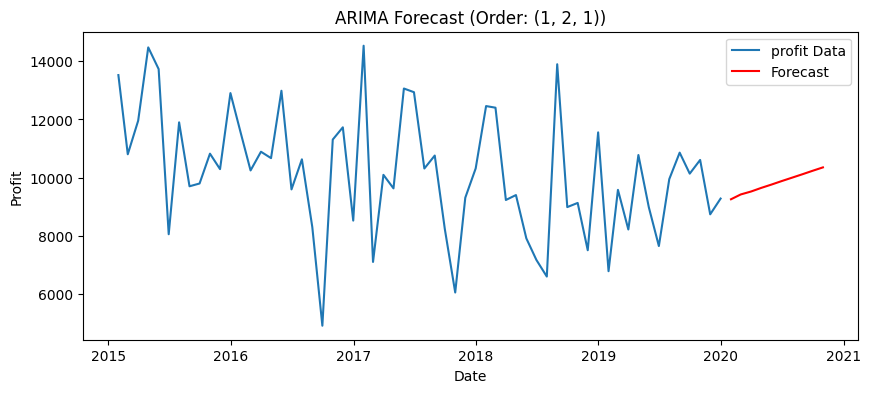

In [59]:
#Since both AIB & BIC are better in ARIMA (1,0,1), this is the proper adjustemnt to profit data.

# ARIMA (1,2,1) FORECAST

# Make predictions
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(profit_data, label='profit Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast (Order: (1, 2, 1))')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

2020-01-31    10022.481214
2020-02-29    10095.157274
2020-03-31    10127.469045
2020-04-30    10141.834856
2020-05-31    10148.221895
2020-06-30    10151.061572
2020-07-31    10152.324092
2020-08-31    10152.885408
2020-09-30    10153.134970
2020-10-31    10153.245924
Freq: ME, Name: predicted_mean, dtype: float64


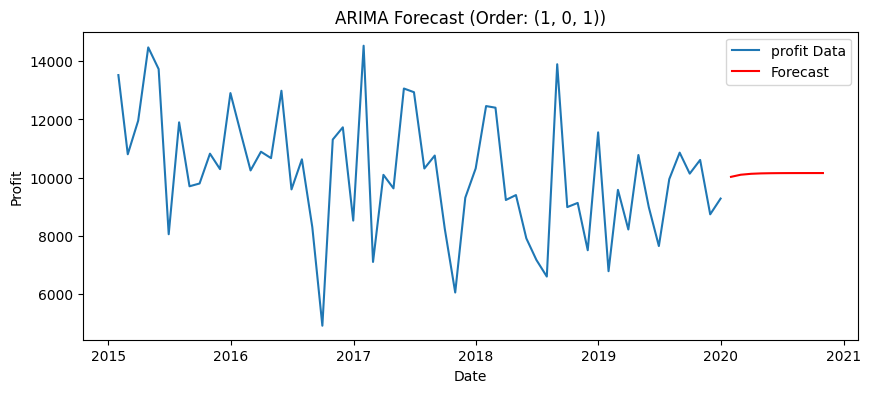

In [60]:
# ARIMA (1,0,1) FORECAST

# Make predictions
forecast2 = model_fit2.forecast(steps=10)
print(forecast2)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(profit_data, label='profit Data')
plt.plot(forecast2, label='Forecast', color='red')
plt.title('ARIMA Forecast (Order: (1, 0, 1))')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()